Introduction to data analytics

Problem 1

#import data / libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import normalize
import seaborn as sns
import matplotlib.pyplot as plt


a_train = pd.read_csv('https://chananchida-srithongdee.github.io/data/A-train.csv')
b_train = pd.read_csv('https://chananchida-srithongdee.github.io/data/B-train.csv')
a_test = pd.read_csv('https://chananchida-srithongdee.github.io/data/A-test.csv')
b_test = pd.read_csv('https://chananchida-srithongdee.github.io/data/B-test.csv')
print("len a_atrain =",len(a_train)," len b_train =",len(b_train))
a_train

len a_atrain = 190  len b_train = 190


,x1,x2,x3,x4,x5,x6,x7,x8,y
0,26.52,89.93,-60.46,1137.04,-3.49,NaN,-5.88,-17.13,7.44
1,-68.18,-127.21,23.30,1471.49,16.95,2.30,-11.51,-7.70,7.31
2,-95.05,36.10,-75.27,1158.04,6.97,3.21,-5.86,8.65,-5.77
3,124.40,-8.19,NaN,5527.92,7.36,7.23,10.77,1.92,-0.42
4,-103.25,NaN,-2.89,4865.06,-5.21,-1.54,NaN,4.69,4.31
...,...,...,...,...,...,...,...,...,...
185,34.29,-38.65,-44.41,9775.28,-3.43,4.95,4.60,-11.73,11.78
186,1.62,145.02,53.26,4546.80,11.81,-4.31,4.86,-0.42,3.79
187,29.46,33.91,-20.96,6083819.57,5.10,2.93,1.23,3.23,-3.17
188,-64.93,25.39,-118.74,1746.40,226.26,-1.91,-16.11,-10.44,0.97


# To check data

---



## a_train

In [ ]:
a_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      181 non-null    float64
 1   x2      180 non-null    float64
 2   x3      180 non-null    float64
 3   x4      181 non-null    float64
 4   x5      180 non-null    float64
 5   x6      180 non-null    float64
 6   x7      180 non-null    float64
 7   x8      181 non-null    float64
 8   y       188 non-null    float64
dtypes: float64(9)
memory usage: 13.5 KB


In [ ]:
a_train.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,y
count,181.000000,180.000000,180.000000,1.810000e+02,180.000000,180.000000,180.000000,181.000000,188.000000
mean,6.314309,6.777722,2.463778,1.386800e+05,-0.053111,1.386444,-0.243444,-0.412652,3.949309
std,386.982400,363.353742,453.783083,8.599234e+05,35.906821,32.370122,34.640373,31.525100,8.350511
min,-2749.920000,-2327.200000,-2771.100000,4.800000e-01,-234.990000,-223.920000,-225.450000,-194.560000,-15.510000
25%,-62.680000,-61.442500,-60.385000,1.266650e+03,-6.060000,-4.710000,-5.907500,-7.200000,-2.260000
50%,12.210000,12.595000,1.815000,4.546800e+03,-0.760000,2.180000,-0.295000,-0.160000,3.555000
75%,75.650000,81.890000,53.740000,1.289133e+04,6.667500,8.462500,6.075000,6.600000,10.620000
max,2244.880000,2333.520000,3155.310000,6.083820e+06,226.260000,188.880000,220.950000,207.040000,28.200000


In [ ]:
# sns.pairplot(a_train)

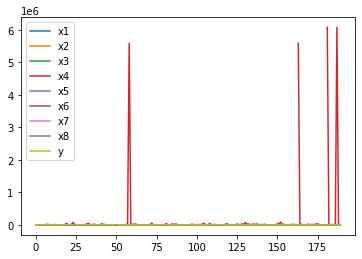

In [ ]:
a_train.plot()

In [ ]:
# sns.boxplot(y="x1",data  = a_train)

## b_train

In [ ]:
print(len(b_train))
b_train

190


,x1,x2,x3,x4,x5,x6,x7,x8,y
0,58.76,123.79,-3.12,-13.11,4.03,224.40,-248.42,7.18,6.73
1,120.85,163.83,14.75,-2.12,8.61,28.05,-73.58,670.29,7.28
2,-19.30,39.05,0.55,1.34,-1.70,-2.19,308.07,3567.67,5.22
3,-65.72,-36.37,10.76,-8.88,15.04,-5.70,14.60,1054.30,6.66
4,11.00,-64.78,-3.23,7.37,25.74,20.48,91.13,102.21,-0.25
...,...,...,...,...,...,...,...,...,...
185,NaN,8.79,-10.48,NaN,12.52,-10.13,NaN,1174.43,3.69
186,-30.81,48.65,NaN,2.58,8.72,6.97,-69.11,1583.24,5.99
187,NaN,50.33,3.13,13.03,NaN,4.53,-173.70,254.72,-6.73
188,101.46,-67.42,0.44,-3.74,8.93,-4.29,21.79,40925.29,-13.39


In [ ]:
b_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      180 non-null    float64
 1   x2      180 non-null    float64
 2   x3      181 non-null    float64
 3   x4      180 non-null    float64
 4   x5      181 non-null    float64
 5   x6      180 non-null    float64
 6   x7      180 non-null    float64
 7   x8      180 non-null    float64
 8   y       188 non-null    float64
dtypes: float64(9)
memory usage: 13.5 KB


In [ ]:
b_train.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,y
count,180.000000,180.000000,181.000000,180.000000,181.000000,180.000000,180.000000,1.800000e+02,188.000000
mean,14.175056,-12.012278,-2.560663,-0.299167,-0.412044,-0.336167,16.658889,1.547451e+05,2.933298
std,359.088122,334.603527,34.802232,33.528208,33.117881,39.515732,372.753379,9.678893e+05,9.200321
min,-2637.520000,-2049.360000,-250.110000,-233.640000,-216.320000,-282.960000,-1987.360000,4.800000e-01,-19.830000
25%,-67.172500,-93.727500,-9.560000,-6.675000,-8.350000,-7.717500,-72.022500,1.326297e+03,-2.935000
50%,-1.655000,-7.895000,-2.670000,0.440000,-0.090000,0.640000,14.715000,4.897925e+03,2.980000
75%,64.937500,50.365000,6.300000,7.390000,8.130000,7.385000,73.755000,1.438690e+04,8.572500
max,2661.480000,2217.600000,192.870000,194.240000,205.920000,224.400000,2772.630000,7.503436e+06,30.600000


In [ ]:
# sns.pairplot(b_train)

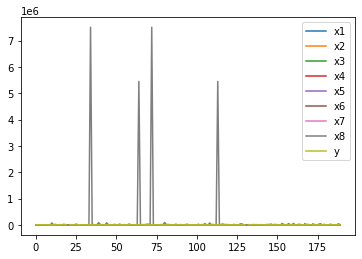

In [ ]:
b_train.plot()

In [ ]:
print(len(a_test))
a_test

10


,x1,x2,x3,x4,x5,x6,x7,x8,y
0,65.16,4.49,-105.75,600.25,-0.91,NaN,-1.36,-7.43,A_01
1,-24.74,-1.55,91.05,2401.98,-1.52,13.60,5.66,10.59,A_02
2,107.54,-28.69,-82.59,25789.15,5.29,-8.56,1.49,-4.73,A_03
3,12.02,32.32,NaN,2.76,1.20,-9.52,-4.20,7.48,A_04
4,45.08,96.62,51.85,1.28,3.58,0.52,-6.86,-0.78,A_05
5,-122.81,17.79,-182.85,2928.97,-1.21,-2.06,9.68,-8.59,A_06
6,77.61,-72.30,97.28,19173.94,-9.29,0.86,7.06,-8.06,A_07
7,-79.36,NaN,-220.91,NaN,7.24,6.19,NaN,9.71,A_08
8,NaN,188.39,-16.47,3976.56,NaN,-1.04,-23.44,NaN,A_09
9,-44.01,131.65,69.88,1778.31,-13.75,-14.75,-12.27,-0.83,A_10


In [ ]:
print(len(b_test))
b_test

10


,x1,x2,x3,x4,x5,x6,x7,x8,y
0,50.69,-120.50,-5.93,7.43,-16.28,-9.26,96.68,10510.35,B_01
1,102.08,74.69,-4.95,-2.20,-4.95,NaN,27.30,36952.37,B_02
2,NaN,49.86,1.00,-5.35,0.72,-9.81,NaN,24768.46,B_03
3,49.39,-101.88,8.69,-7.54,-11.28,4.61,-15.11,NaN,B_04
4,140.49,59.99,0.05,6.55,NaN,-0.42,109.93,2603.04,B_05
5,54.08,NaN,11.00,-16.44,5.31,17.83,-90.67,5.20,B_06
6,106.48,-50.55,16.47,NaN,1.34,-11.53,138.03,1753.93,B_07
7,-83.82,-104.84,NaN,-13.70,10.19,-2.51,-34.02,7494.36,B_08
8,147.15,9.14,-3.06,1.97,8.14,26.99,37.34,249.96,B_09
9,8.68,-207.09,-4.37,-10.22,-5.01,10.57,-24.65,20.43,B_10


#Data Processing


## Fill missing data
---





In [ ]:
for i in range(1,10):
   tmp="x"
   tmp +=str(i)
   if i == 9:
     tmp = "y"
   a_train.fillna(a_train[[tmp]].mean(),inplace=True,)
   b_train.fillna(b_train[[tmp]].mean(),inplace=True,)
   a_test.fillna(a_test[[tmp]].mean(),inplace=True,)
   b_test.fillna(b_test[[tmp]].mean(),inplace=True,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if __name__ == '__main__':


In [ ]:
a_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      190 non-null    float64
 1   x2      190 non-null    float64
 2   x3      190 non-null    float64
 3   x4      190 non-null    float64
 4   x5      190 non-null    float64
 5   x6      190 non-null    float64
 6   x7      190 non-null    float64
 7   x8      190 non-null    float64
 8   y       190 non-null    float64
dtypes: float64(9)
memory usage: 13.5 KB


In [ ]:
a_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      10 non-null     float64
 1   x2      10 non-null     float64
 2   x3      10 non-null     float64
 3   x4      10 non-null     float64
 4   x5      10 non-null     float64
 5   x6      10 non-null     float64
 6   x7      10 non-null     float64
 7   x8      10 non-null     float64
 8   y       10 non-null     object 
dtypes: float64(8), object(1)
memory usage: 848.0+ bytes




## manage the outliers



In [ ]:
a_train

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,26.52,89.930000,-60.460000,1137.04,-3.49,1.386444,-5.880000,-17.13,7.44
1,-68.18,-127.210000,23.300000,1471.49,16.95,2.300000,-11.510000,-7.70,7.31
2,-95.05,36.100000,-75.270000,1158.04,6.97,3.210000,-5.860000,8.65,-5.77
3,124.40,-8.190000,2.463778,5527.92,7.36,7.230000,10.770000,1.92,-0.42
4,-103.25,6.777722,-2.890000,4865.06,-5.21,-1.540000,-0.243444,4.69,4.31
...,...,...,...,...,...,...,...,...,...
185,34.29,-38.650000,-44.410000,9775.28,-3.43,4.950000,4.600000,-11.73,11.78
186,1.62,145.020000,53.260000,4546.80,11.81,-4.310000,4.860000,-0.42,3.79
187,29.46,33.910000,-20.960000,6083819.57,5.10,2.930000,1.230000,3.23,-3.17
188,-64.93,25.390000,-118.740000,1746.40,226.26,-1.910000,-16.110000,-10.44,0.97


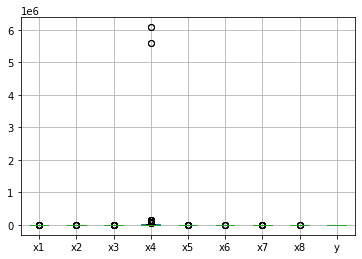

In [ ]:
a_train.boxplot()

In [ ]:
b_train

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,58.760000,123.79,-3.120000,-13.110000,4.030000,224.40,-248.420000,7.18,6.73
1,120.850000,163.83,14.750000,-2.120000,8.610000,28.05,-73.580000,670.29,7.28
2,-19.300000,39.05,0.550000,1.340000,-1.700000,-2.19,308.070000,3567.67,5.22
3,-65.720000,-36.37,10.760000,-8.880000,15.040000,-5.70,14.600000,1054.30,6.66
4,11.000000,-64.78,-3.230000,7.370000,25.740000,20.48,91.130000,102.21,-0.25
...,...,...,...,...,...,...,...,...,...
185,14.175056,8.79,-10.480000,-0.299167,12.520000,-10.13,16.658889,1174.43,3.69
186,-30.810000,48.65,-2.560663,2.580000,8.720000,6.97,-69.110000,1583.24,5.99
187,14.175056,50.33,3.130000,13.030000,-0.412044,4.53,-173.700000,254.72,-6.73
188,101.460000,-67.42,0.440000,-3.740000,8.930000,-4.29,21.790000,40925.29,-13.39


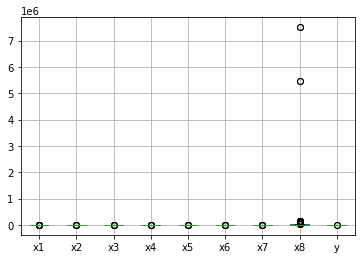

In [ ]:
b_train.boxplot()

In [ ]:
for i in range(1,9):
   tmp="x"
   tmp +=str(i)
   q3_a, q1_a = np.percentile(a_train[[tmp]], [75 ,25])
   q3_at, q1_at = np.percentile(a_test[[tmp]], [75 ,25])
   q3_b, q1_b = np.percentile(b_train[[tmp]], [75 ,25])
   q3_bt, q1_bt = np.percentile(b_test[[tmp]], [75 ,25])
   iqr_a = q3_a - q1_a
   floor_a =  q1_a - 1.5*iqr_a
   ceil_a =   q3_a + 1.5*iqr_a
   iqr_b = q3_b - q1_b
   floor_b =  q1_b - 1.5*iqr_b
   ceil_b =   q3_b + 1.5*iqr_b
   iqr_at = q3_at - q1_at
   floor_at =  q1_at - 1.5*iqr_at
   ceil_at =   q3_at + 1.5*iqr_at
   iqr_bt = q3_bt - q1_bt
   floor_bt =  q1_b - 1.5*iqr_bt
   ceil_bt =   q3_b + 1.5*iqr_bt

   a_train[[tmp]] = np.where(a_train[[tmp]]> ceil_a, ceil_a,
                                      np.where(a_train[[tmp]]< floor_a, floor_a,
                                      a_train[[tmp]]))
   b_train[[tmp]] = np.where(b_train[[tmp]]> ceil_b, ceil_b,
                                      np.where(b_train[[tmp]]< floor_b, floor_b,
                                      b_train[[tmp]]))
   a_test[[tmp]] = np.where(a_test[[tmp]]> ceil_at, ceil_at,
                                      np.where(a_test[[tmp]]< floor_at, floor_at,
                                      a_test[[tmp]]))
   b_test[[tmp]] = np.where(b_test[[tmp]]> ceil_bt, ceil_bt,
                                      np.where(b_test[[tmp]]< floor_bt, floor_bt,
                                      b_test[[tmp]]))

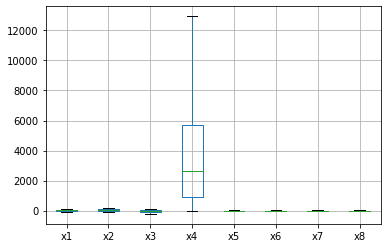

In [ ]:
a_test.boxplot()

##data transformation 

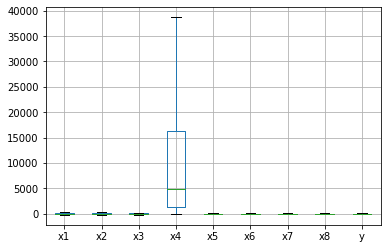

In [ ]:
a_train.boxplot()

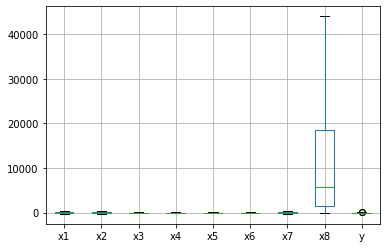

In [ ]:
b_train.boxplot()

### scaling data( min-max normalization)

In [ ]:
a_train

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,26.52,89.930000,-60.460000,1137.04000,-3.49000,1.386444,-5.880000,-17.13,7.44
1,-68.18,-127.210000,23.300000,1471.49000,16.95000,2.300000,-11.510000,-7.70,7.31
2,-95.05,36.100000,-75.270000,1158.04000,6.97000,3.210000,-5.860000,8.65,-5.77
3,124.40,-8.190000,2.463778,5527.92000,7.36000,7.230000,10.770000,1.92,-0.42
4,-103.25,6.777722,-2.890000,4865.06000,-5.21000,-1.540000,-0.243444,4.69,4.31
...,...,...,...,...,...,...,...,...,...
185,34.29,-38.650000,-44.410000,9775.28000,-3.43000,4.950000,4.600000,-11.73,11.78
186,1.62,145.020000,53.260000,4546.80000,11.81000,-4.310000,4.860000,-0.42,3.79
187,29.46,33.910000,-20.960000,38721.94125,5.10000,2.930000,1.230000,3.23,-3.17
188,-64.93,25.390000,-118.740000,1746.40000,24.41875,-1.910000,-16.110000,-10.44,0.97


In [ ]:
normalized_df=(a_train-a_train.min())/(a_train.max()-a_train.min())
a_train = normalized_df  
normalized_df=(b_train-b_train.min())/(b_train.max()-b_train.min())
b_train = normalized_df  
# normalized_df=(a_test-a_test.min())/(a_test.max()-a_test.min())
# a_test = normalized_df  
# normalized_df=(b_test-b_test.min())/(b_test.max()-b_test.min())
# b_test = normalized_df  

In [ ]:
a_train

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,0.536771,0.648048,0.370290,0.029352,0.418931,0.490072,0.372061,0.179533,0.525051
1,0.343596,0.245668,0.565095,0.037990,0.844498,0.508310,0.249510,0.358403,0.522077
2,0.288785,0.548296,0.335846,0.029895,0.636711,0.526477,0.372497,0.668532,0.222832
3,0.736432,0.466223,0.516635,0.142749,0.644831,0.606733,0.734491,0.540876,0.345230
4,0.272059,0.493959,0.504183,0.125630,0.383120,0.431648,0.494755,0.593418,0.453443
...,...,...,...,...,...,...,...,...,...
185,0.552621,0.409778,0.407619,0.252439,0.420180,0.561215,0.600185,0.281961,0.624342
186,0.485979,0.750134,0.634774,0.117411,0.737482,0.376348,0.605845,0.496491,0.441547
187,0.542768,0.544238,0.462157,1.000000,0.597777,0.520887,0.526828,0.565725,0.282315
188,0.350226,0.528450,0.234746,0.045089,1.000000,0.424261,0.149380,0.306430,0.377030


In [ ]:
b_train

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,0.624865,0.761136,0.475766,0.239208,0.581976,1.000000,0.057459,0.000152,0.526671
1,0.748921,0.833523,0.779936,0.453396,0.663067,0.990882,0.369306,0.015222,0.537577
2,0.468901,0.607938,0.538234,0.520829,0.480524,0.461934,1.000000,0.081068,0.496728
3,0.376154,0.471589,0.712021,0.321648,0.776912,0.400538,0.526585,0.023949,0.525283
4,0.529441,0.420228,0.473894,0.638350,0.966360,0.858470,0.663085,0.002312,0.388261
...,...,...,...,...,...,...,...,...,...
185,0.535784,0.553232,0.350489,0.488883,0.732295,0.323050,0.530257,0.026679,0.466389
186,0.445904,0.625294,0.485287,0.544996,0.665014,0.622158,0.377279,0.035970,0.511997
187,0.535784,0.628331,0.582149,0.748660,0.503328,0.579478,0.190731,0.005778,0.259766
188,0.710180,0.415455,0.536362,0.421823,0.668732,0.425201,0.539409,0.930058,0.127702


# data exploration

In [ ]:
a_train

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,0.536771,0.648048,0.370290,0.029352,0.418931,0.490072,0.372061,0.179533,0.525051
1,0.343596,0.245668,0.565095,0.037990,0.844498,0.508310,0.249510,0.358403,0.522077
2,0.288785,0.548296,0.335846,0.029895,0.636711,0.526477,0.372497,0.668532,0.222832
3,0.736432,0.466223,0.516635,0.142749,0.644831,0.606733,0.734491,0.540876,0.345230
4,0.272059,0.493959,0.504183,0.125630,0.383120,0.431648,0.494755,0.593418,0.453443
...,...,...,...,...,...,...,...,...,...
185,0.552621,0.409778,0.407619,0.252439,0.420180,0.561215,0.600185,0.281961,0.624342
186,0.485979,0.750134,0.634774,0.117411,0.737482,0.376348,0.605845,0.496491,0.441547
187,0.542768,0.544238,0.462157,1.000000,0.597777,0.520887,0.526828,0.565725,0.282315
188,0.350226,0.528450,0.234746,0.045089,1.000000,0.424261,0.149380,0.306430,0.377030


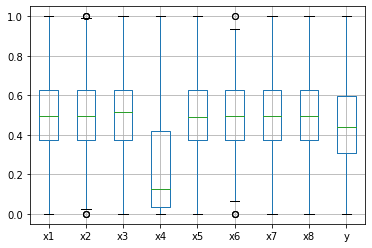

In [ ]:
a_train.boxplot()

In [ ]:
b_train

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,0.624865,0.761136,0.475766,0.239208,0.581976,1.000000,0.057459,0.000152,0.526671
1,0.748921,0.833523,0.779936,0.453396,0.663067,0.990882,0.369306,0.015222,0.537577
2,0.468901,0.607938,0.538234,0.520829,0.480524,0.461934,1.000000,0.081068,0.496728
3,0.376154,0.471589,0.712021,0.321648,0.776912,0.400538,0.526585,0.023949,0.525283
4,0.529441,0.420228,0.473894,0.638350,0.966360,0.858470,0.663085,0.002312,0.388261
...,...,...,...,...,...,...,...,...,...
185,0.535784,0.553232,0.350489,0.488883,0.732295,0.323050,0.530257,0.026679,0.466389
186,0.445904,0.625294,0.485287,0.544996,0.665014,0.622158,0.377279,0.035970,0.511997
187,0.535784,0.628331,0.582149,0.748660,0.503328,0.579478,0.190731,0.005778,0.259766
188,0.710180,0.415455,0.536362,0.421823,0.668732,0.425201,0.539409,0.930058,0.127702


In [ ]:
b_train.boxplot()

# data processing (2)

In [ ]:
for i in range(1,9):
   tmp="x"
   tmp +=str(i)
   q3_a, q1_a = np.percentile(a_train[[tmp]], [75 ,25])
   q3_b, q1_b = np.percentile(b_train[[tmp]], [75 ,25])
   iqr_a = q3_a - q1_a
   floor_a =  q1_a - 1.5*iqr_a
   ceil_a =   q3_a + 1.5*iqr_a
   iqr_b = q3_b - q1_b
   floor_b =  q1_b - 1.5*iqr_b
   ceil_b =   q3_b + 1.5*iqr_b
   a_train[[tmp]] = np.where(a_train[[tmp]]> ceil_a, ceil_a,
                                      np.where(a_train[[tmp]]< floor_a, floor_a,
                                      a_train[[tmp]]))
   b_train[[tmp]] = np.where(b_train[[tmp]]> ceil_b, ceil_b,
                                      np.where(b_train[[tmp]]< floor_b, floor_b,
                                      b_train[[tmp]]))

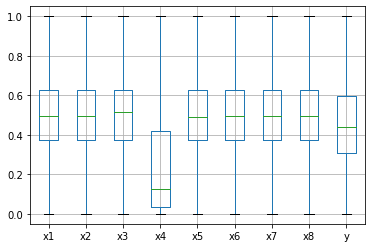

In [ ]:
a_train.boxplot()

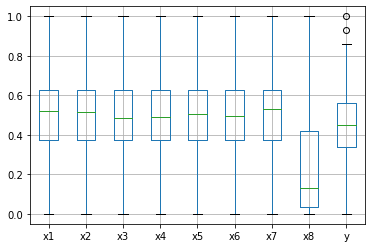

In [ ]:
b_train.boxplot()

# Train Model

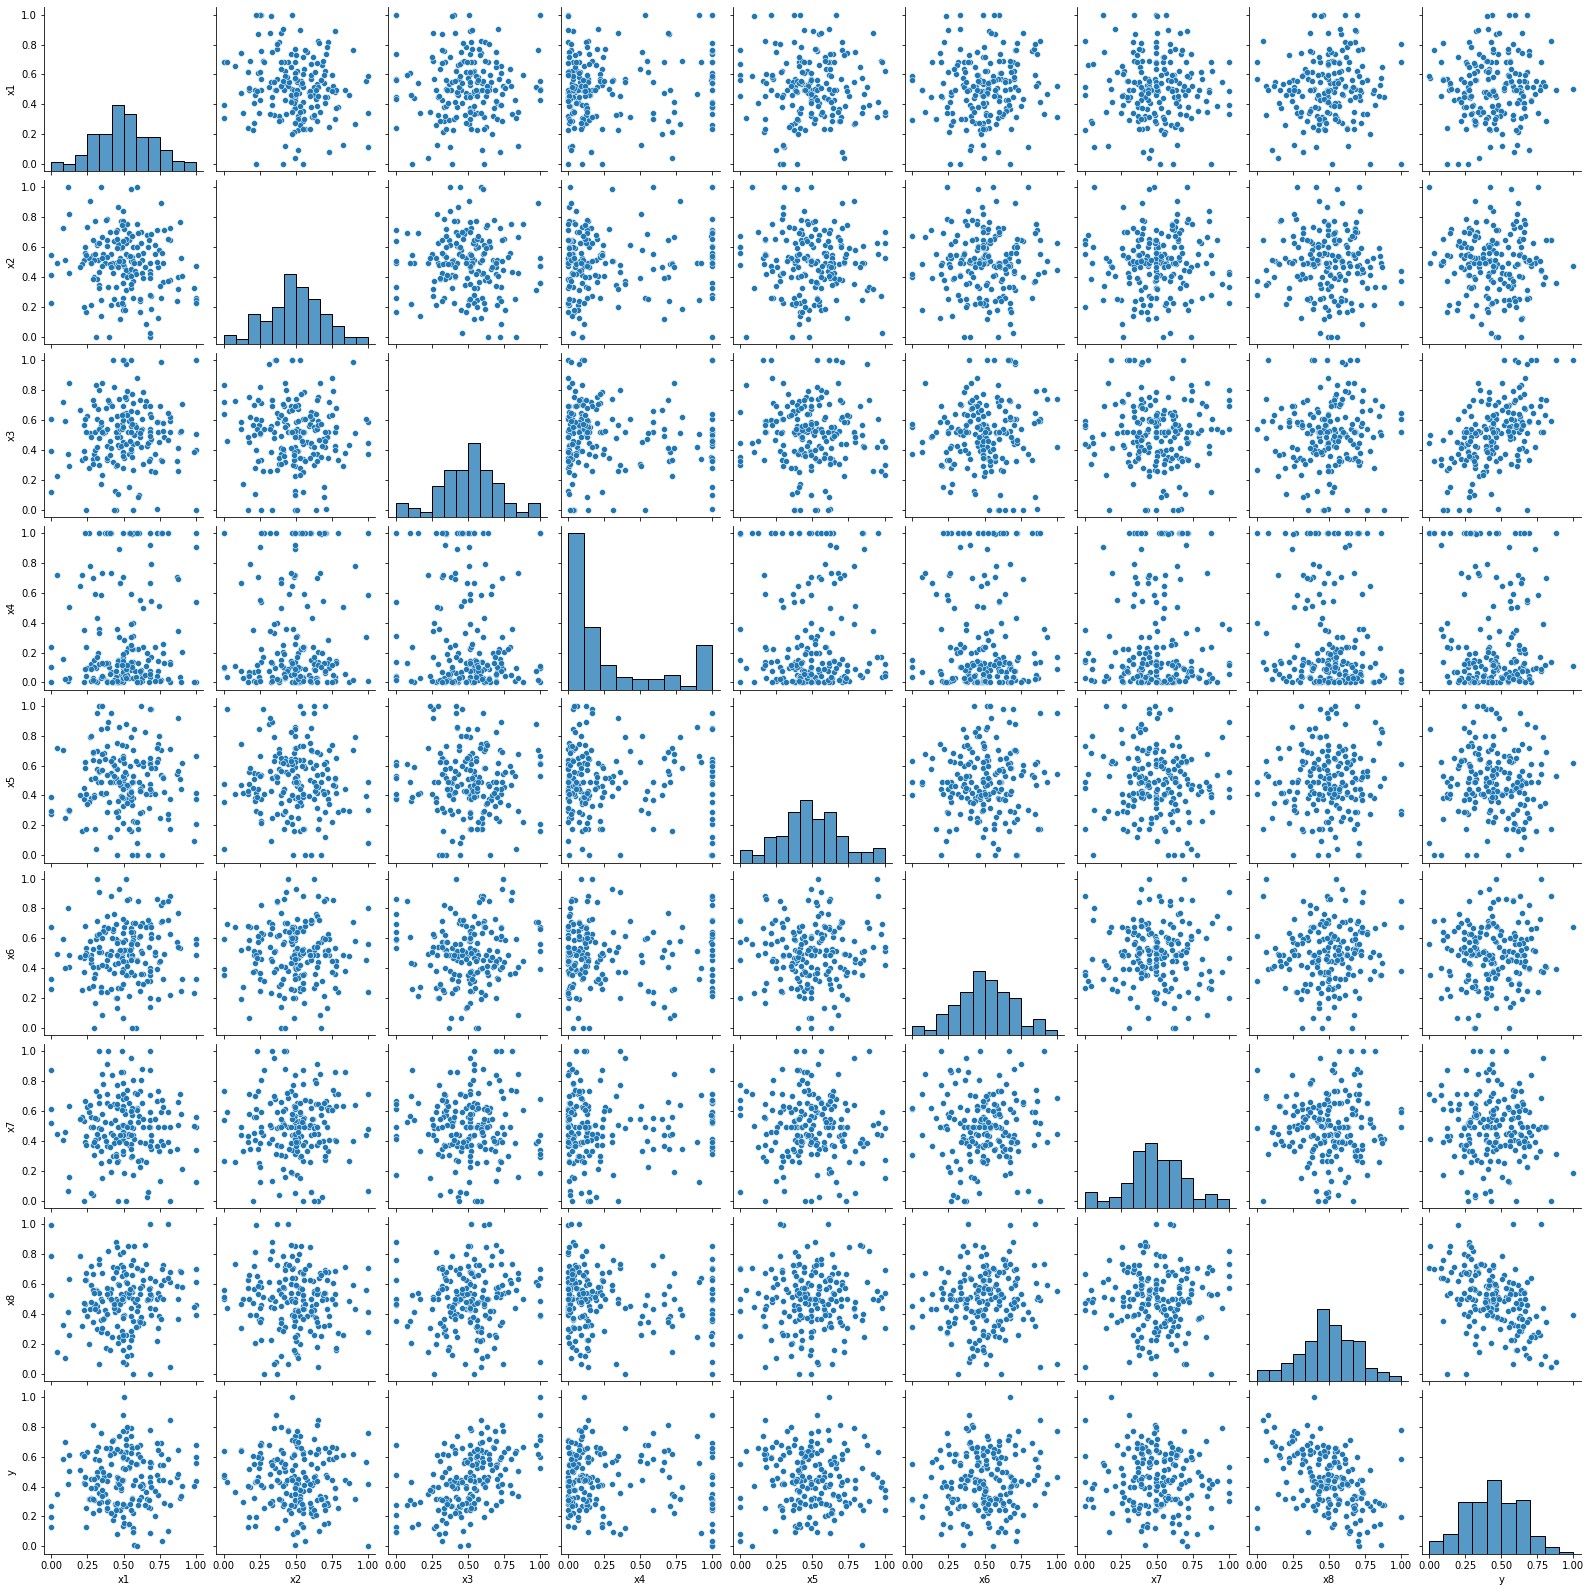

In [ ]:
# sns.pairplot(a_train)

In [ ]:
# sns.pairplot(b_train)

In [ ]:
model_a = LinearRegression()
model_a.fit(a_train.iloc[:,0:8], a_train[["y"]])

LinearRegression()

In [ ]:
model_a.coef_

array([[ 0.06779389, -0.05216299,  0.47336204, -0.04545108,  0.00566409,
         0.06896261, -0.03642915, -0.4922128 ]])

In [ ]:
model_a.intercept_

array([0.43395965])

In [ ]:
a_test.iloc[:,0:8]

,x1,x2,x3,x4,x5,x6,x7,x8
0,65.160000,4.490000,-105.750000,600.2500,-0.910000,-1.64,-1.360000,-7.430000
1,-24.740000,-1.550000,91.050000,2401.9800,-1.520000,12.34,5.660000,10.590000
2,107.540000,-28.690000,-82.590000,12945.9525,5.290000,-8.56,1.490000,-4.730000
3,12.020000,32.320000,-33.167778,2.7600,1.200000,-9.52,-4.200000,7.480000
4,45.080000,96.620000,51.850000,1.2800,3.580000,0.52,-6.860000,-0.780000
5,-122.810000,17.790000,-182.850000,2928.9700,-1.210000,-2.06,9.680000,-8.590000
6,77.610000,-72.300000,97.280000,12945.9525,-8.083750,0.86,7.060000,-8.060000
7,-79.360000,40.968889,-220.910000,6294.8000,7.240000,6.19,-2.693333,9.710000
8,4.054444,188.390000,-16.470000,3976.5600,-1.041111,-1.04,-22.413750,-0.293333
9,-44.010000,131.650000,69.880000,1778.3100,-8.083750,-14.75,-12.270000,-0.830000


In [ ]:
a_y_pred = pd.DataFrame(model_a.predict(a_test.iloc[:,0:8])) 

In [ ]:
a_y_pred

,0
0,-69.134416
1,-71.811711
2,-616.567879
3,-20.441354
4,23.625733
5,-224.772327
6,-529.168456
7,-401.972468
8,-196.770097
9,-57.371940


In [ ]:
a_train[["y"]].iloc[0:10]

,y
0,0.525051
1,0.522077
2,0.222832
3,0.345230
4,0.453443
5,0.721574
6,0.470373
7,0.125601
8,0.148936
9,0.331732


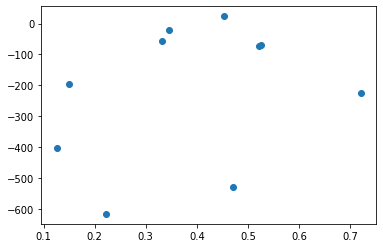

In [ ]:
plt.scatter(a_train[["y"]].iloc[0:10],model_a.predict(a_test.iloc[:,0:8]))

In [68]:
rmse = metrics.mean_squared_error(a_train[["y"]].iloc[0:10],model_a.predict(a_test.iloc[:,0:8]), squared=False)
print("RMSE = ", rmse)

RMSE =  304.4074408923232


In [ ]:
model_b = LinearRegression()
model_b.fit(b_train.iloc[:,0:8], b_train[["y"]])

LinearRegression()

In [ ]:
model_b.predict(b_test.iloc[:,0:8])

array([[-285.10080172],
       [-634.22069925],
       [-474.47806922],
       [-255.92829611],
       [ -77.70596386],
       [ -49.40879725],
       [-104.36752373],
       [-161.08126623],
       [ -61.43086993],
       [-114.31703282]])

In [ ]:
model_b.coef_

array([[-0.45373   ,  0.53128184, -0.01926475, -0.01457891,  0.03769386,
         0.04103697,  0.03326299, -0.01909416]])

In [ ]:
model_b.intercept_

array([0.37642741])